In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import itertools
import os
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                              
from tqdm import tqdm
import pandas as pd

In [46]:
class_names = ['Boat', 'Bus', 'Cycle','Helicopter','Truck']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [47]:
model = tf.keras.models.load_model('Vehicle_Court_Model.h5py')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [49]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['Test']
    output = []
    
    # Iterate through training and test sets

        
    images = []
    labels = []
        
    print("Loading {}".format(datasets[0]))
        
        # Iterate through each folder corresponding to a category
    for folder in os.listdir(datasets[0]):
          label = class_names_label[folder]
            
            # Iterate through each image in our folder
          for file in tqdm(os.listdir(os.path.join(datasets[0], folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(datasets[0], folder), file)
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
        
    output.append((images, labels))

    return images,labels

In [50]:
test_images, test_labels = load_data()

Loading Test


100%|██████████| 6/6 [00:00<00:00, 1984.06it/s]


In [51]:
n_test = test_labels.shape[0]

print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of testing examples: 27
Each image is of size: (150, 150)


Scale The Data :

In [52]:
test_images = test_images / 255.0

In [53]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

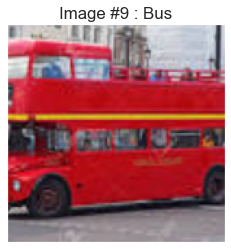

In [54]:
display_random_image(class_names, test_images, test_labels)

In [55]:
from keras import models
layer_outputs = [layer.output for layer in model.layers]

activation_models=models.Model(inputs=model.input,outputs=layer_outputs)
activations = activation_models.predict(test_images,verbose=0)

pred_labels=np.argmax(activations[6],axis=1) 

In [56]:
pred_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 3, 3, 3, 3, 0, 4, 1,
       4, 4, 4, 4, 1], dtype=int64)

In [57]:
def display_examples(class_names, images, labels,imageSize):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(imageSize):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [58]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels,len(mislabeled_images))

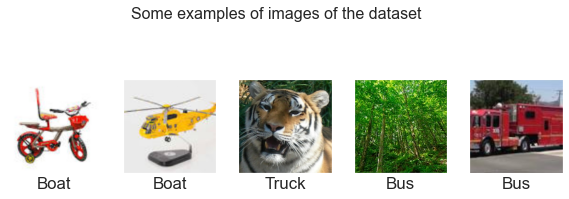

In [59]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [16]:
test_layers=[]
for i in range(len(activations)):
  test_layers.append(activations[i])


In [17]:
test_layers[6].shape

(25, 5)

In [18]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
X=[0,0,0,0,0,0,0] 
n_test0,x,y,z=test_layers[0].shape

X[0]=test_layers[0].reshape(n_test,x*y*z)

n_test1,x,y,z=test_layers[1].shape
numFeatures=x*y*z
X[1]=test_layers[1].reshape(n_test1,numFeatures)
n_test2,x,y,z=test_layers[2].shape
numFeatures=x*y*z
X[2]=test_layers[2].reshape(n_test2,numFeatures)
n_test3,x,y,z=test_layers[3].shape
numFeatures=x*y*z
X[3]=test_layers[3].reshape(n_test3,numFeatures)

n_test4,y=test_layers[4].shape

X[4]=test_layers[4].reshape(n_test4,y)

n_test5,y=test_layers[5].shape

X[5]=test_layers[5].reshape(n_test5,y)

n_test6,y=test_layers[6].shape
X[6]=test_layers[6].reshape(n_test6,y)

In [19]:

df0=pca.fit_transform(X[0])
df1=pca.fit_transform(X[1])
df2=pca.fit_transform(X[2])
df3=pca.fit_transform(X[3])
df4=pca.fit_transform(X[4])
df5=pca.fit_transform(X[5])
df6=pca.fit_transform(X[6])
cor0=df0
cor1=df1
cor2=df2
cor3=df3
cor4=df4
cor5=df5
cor6=df6

In [20]:
from sklearn.cluster import KMeans
nb_clusters=4
kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
df0=kmeans.fit_predict(df0)

#LAYER 1
nb_clusters=6
kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
df1=kmeans.fit_predict(df1)

#LAYER 2
nb_clusters=7
kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
df2=kmeans.fit_predict(df2)

#LAYER 3
nb_clusters=3
kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
df3=kmeans.fit_predict(df3)

#LAYER 4
nb_clusters=2
kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
df4=kmeans.fit_predict(df4)

#LAYER 5
nb_clusters=8
kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
df5=kmeans.fit_predict(df5)

#LAYER 6
nb_clusters=4
kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
df6=kmeans.fit_predict(df6)


In [21]:
#Groupe pour coloration et nommage des classes
classes=[]
names=[]
for elt in test_labels:
  if(elt==0):
    classes.append(0)
    names.append('Boat')
  elif(elt==1):
    classes.append(0.5)
    names.append('Bus')
  elif(elt==2):
    classes.append(0.7)
    names.append('Cycle')
  elif(elt==3):
    classes.append(0.9)
    names.append('Helicopter')
  elif(elt==4):
    classes.append(1)
    names.append('Truck')


In [22]:
input=pd.DataFrame(names,columns=['Class'])
df0=pd.DataFrame(df0,columns=['L1 C1'])
df0["L1 C1"]= df0["L1 C1"].astype(str)

df1=pd.DataFrame(df1,columns=['L2 C1'])
df1["L2 C1"]= df1["L2 C1"].astype(str)

df2=pd.DataFrame(df2,columns=['L3 C1'])
df2["L3 C1"]= df2["L3 C1"].astype(str)

df3=pd.DataFrame(df3,columns=['L4 C1'])
df3["L4 C1"]= df3["L4 C1"].astype(str)

df4=pd.DataFrame(df4,columns=['L5 C1'])
df4["L5 C1"]= df4["L5 C1"].astype(str)

df5=pd.DataFrame(df5,columns=['L6 C1'])
df5["L6 C1"]= df5["L6 C1"].astype(str)


In [23]:
pred_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 3, 3, 3, 3, 0, 4, 4,
       4, 4, 1], dtype=int64)

In [24]:
pred_names=[]
for elt in pred_labels:
    if(elt==0):
        pred_names.append('Boat')
    elif(elt==1):
        pred_names.append('Bus')
    elif(elt==2):
        pred_names.append('Cycle')
    elif(elt==3):
        pred_names.append('Helicopter')
    elif(elt==4):
        pred_names.append('Truck')
pred_names=pd.DataFrame(pred_names,columns=['class'])

In [25]:
pred_names.head(25)

,class
0,Boat
1,Boat
2,Boat
3,Boat
4,Boat
5,Bus
6,Bus
7,Bus
8,Bus
9,Bus


In [26]:
dfTot=pd.concat([input,df0,df1,df2,df3,df4,df5,pred_names],axis=1,join='inner')

In [27]:
dfTot.head(25)

,Class,L1 C1,L2 C1,L3 C1,L4 C1,L5 C1,L6 C1,class
0,Boat,2,2,4,0,0,5,Boat
1,Boat,0,3,5,1,1,6,Boat
2,Boat,3,1,3,1,1,6,Boat
3,Boat,2,2,1,0,0,0,Boat
4,Boat,1,1,4,0,0,5,Boat
5,Bus,0,0,2,1,1,2,Bus
6,Bus,0,4,1,0,0,0,Bus
7,Bus,0,4,4,0,0,0,Bus
8,Bus,0,3,1,1,1,4,Bus
9,Bus,0,0,2,1,1,4,Bus


In [29]:
#import plotly.express as px
#px.colors.qualitative.swatches()

In [32]:
import plotly.express as px

color = pd.DataFrame(classes,columns=['Class']);
colorscale =[[0, 'black'],[0.5, 'Green'],[0.7,'rgb(98,118,83)'],[0.9,'rgb(190,186,218)'],[1,'blue']];

fig=px.parallel_categories(dfTot,dimensions=['Class','L1 C1','L2 C1','L3 C1', 'L4 C1','L5 C1','L6 C1','class'], labels={'Class':'Class Input','L1 C1':'Hidden Layer 1','L2 C1':'Hidden Layer 2','L3 C1':'Hidden Layer 3','L4 C1':'Hidden Layer 4','L5 C1':'Hidden Layer 5','L6 C1':'Hidden Layer 6','class':'Output Classes'},color=classes,color_continuous_scale=colorscale)
fig.update(layout_coloraxis_showscale=False)

fig

In [33]:
# !pip install chart_studio
# import chart_studio.tools as tls

# import chart_studio
# username = 'Username' # your username
# api_key = 'API Key' # your api key - go to profile > settings > regenerate key
# chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
# import chart_studio.plotly as py
# import chart_studio.tools as tls



In [34]:
#py.plot(fig,filename='Vehicle_Court',auto_open=False)
fig.write_html("Vehicle_Court.html")

'https://plotly.com/~kaansen/30/'

In [35]:
# CLASSE 0
import plotly.express as px

color = pd.DataFrame(classes,columns=['Class']);
colorscale =[[0, 'red'],[0.5, 'gray'],[0.7,'gray'],[0.9,'gray'],[1,'gray']];

fig=px.parallel_categories(dfTot,dimensions=['Class','L1 C1','L2 C1','L3 C1', 'L4 C1','L5 C1','L6 C1','class'], labels={'Class':'Class Input','L1 C1':'Hidden Layer 1','L2 C1':'Hidden Layer 2','L3 C1':'Hidden Layer 3','L4 C1':'Hidden Layer 4','L5 C1':'Hidden Layer 5','L6 C1':'Hidden Layer 6','class':'Output Classes'},color=classes,color_continuous_scale=colorscale)
fig.update(layout_coloraxis_showscale=False)

fig


In [36]:
#py.plot(fig,filename='Vehicle_Court_Boat',auto_open=False)
fig.write_html("Vehicle_Court_Boat.html")

'https://plotly.com/~kaansen/32/'

In [37]:
# CLASSE 1
import plotly.express as px

color = pd.DataFrame(classes,columns=['Class']);
colorscale =[[0, 'gray'],[0.5, 'red'],[0.7,'gray'],[0.9,'gray'],[1,'gray']];

fig=px.parallel_categories(dfTot,dimensions=['Class','L1 C1','L2 C1','L3 C1', 'L4 C1','L5 C1','L6 C1','class'], labels={'Class':'Class Input','L1 C1':'Hidden Layer 1','L2 C1':'Hidden Layer 2','L3 C1':'Hidden Layer 3','L4 C1':'Hidden Layer 4','L5 C1':'Hidden Layer 5','L6 C1':'Hidden Layer 6','class':'Output Classes'},color=classes,color_continuous_scale=colorscale)
fig.update(layout_coloraxis_showscale=False)

fig

In [38]:
#py.plot(fig,filename='Vehicle_Court_Bus',auto_open=False)
fig.write_html("Vehicle_Court_Bus.html")

'https://plotly.com/~kaansen/34/'

In [39]:
# CLASSE 2
import plotly.express as px

color = pd.DataFrame(classes,columns=['Class']);
colorscale =[[0, 'gray'],[0.5, 'gray'],[0.7,'red'],[0.9,'gray'],[1,'gray']];

fig=px.parallel_categories(dfTot,dimensions=['Class','L1 C1','L2 C1','L3 C1', 'L4 C1','L5 C1','L6 C1','class'], labels={'Class':'Class Input','L1 C1':'Hidden Layer 1','L2 C1':'Hidden Layer 2','L3 C1':'Hidden Layer 3','L4 C1':'Hidden Layer 4','L5 C1':'Hidden Layer 5','L6 C1':'Hidden Layer 6','class':'Output Classes'},color=classes,color_continuous_scale=colorscale)
fig.update(layout_coloraxis_showscale=False)

fig

In [40]:
#py.plot(fig,filename='Vehicle_Court_Cycle',auto_open=False)
fig.write_html("Vehicle_Court_Cycle.html")

'https://plotly.com/~kaansen/36/'

In [41]:
# CLASSE 3
import plotly.express as px

color = pd.DataFrame(classes,columns=['Class']);
colorscale =[[0, 'gray'],[0.5, 'gray'],[0.7,'gray'],[0.9,'red'],[1,'gray']];

fig=px.parallel_categories(dfTot,dimensions=['Class','L1 C1','L2 C1','L3 C1', 'L4 C1','L5 C1','L6 C1','class'], labels={'Class':'Class Input','L1 C1':'Hidden Layer 1','L2 C1':'Hidden Layer 2','L3 C1':'Hidden Layer 3','L4 C1':'Hidden Layer 4','L5 C1':'Hidden Layer 5','L6 C1':'Hidden Layer 6','class':'Output Classes'},color=classes,color_continuous_scale=colorscale)
fig.update(layout_coloraxis_showscale=False)

fig

In [42]:
#py.plot(fig,filename='Vehicle_Court_Helicopter',auto_open=False)
fig.write_html("Vehicle_Court_Helicopter.html")

'https://plotly.com/~kaansen/38/'

In [43]:
# CLASSE 4
import plotly.express as px

color = pd.DataFrame(classes,columns=['Class']);
colorscale =[[0, 'gray'],[0.5, 'gray'],[0.7,'gray'],[0.9,'gray'],[1,'red']];

fig=px.parallel_categories(dfTot,dimensions=['Class','L1 C1','L2 C1','L3 C1', 'L4 C1','L5 C1','L6 C1','class'], labels={'Class':'Class Input','L1 C1':'Hidden Layer 1','L2 C1':'Hidden Layer 2','L3 C1':'Hidden Layer 3','L4 C1':'Hidden Layer 4','L5 C1':'Hidden Layer 5','L6 C1':'Hidden Layer 6','class':'Output Classes'},color=classes,color_continuous_scale=colorscale)
fig.update(layout_coloraxis_showscale=False)

fig

In [44]:
#py.plot(fig,filename='Vehicle_Court_Truck',auto_open=False)
fig.write_html("Vehicle_Court_Truck.html")

'https://plotly.com/~kaansen/40/'